## HYSETS (North America)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/HYSETS.ipynb)

[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/datasets/HYSETS.ipynb)


This notebook explores HYSETS dataset which was introduced by [Arsenault et al., 2020](https://www.nature.com/articles/s41597-020-00583-2).

In [1]:
from ai4water.eda import EDA
from ai4water.datasets import HYSETS
from ai4water.utils.utils import get_version_info

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from easy_mpl import hist, ridge
from easy_mpl import scatter
from easy_mpl.utils import process_cbar


**********Tensorflow models could not be imported **********



C:\Users\ather\.conda\envs\cat_aware\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
for k,v in get_version_info().items():
    print(k, v)

python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]
os nt
ai4water 1.07
easy_mpl 0.21.3
SeqMetrics 1.3.4
numpy 1.24.3
pandas 1.3.4
matplotlib 3.6.0
sklearn 1.3.0
xarray 0.20.1
netCDF4 1.5.7
seaborn 0.12.2


In [4]:
dataset = HYSETS(
    path=r"E:\data\gscad\HYSETS"   # set path to None if you have not already downloaded data
)


In [5]:
dataset.start

'19500101'

In [6]:
dataset.end

'20181231'

In [7]:
stations = dataset.stations()
len(stations)

14425

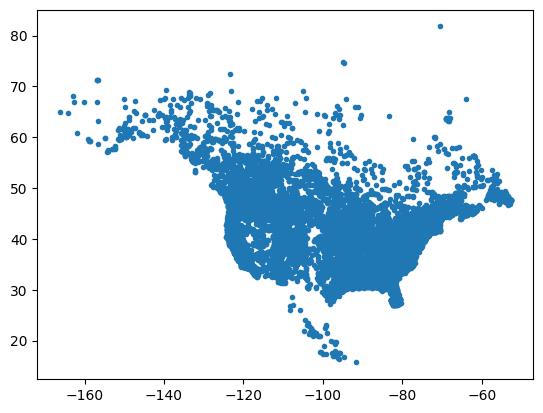

<AxesSubplot: >

In [8]:
dataset.plot_stations()

### Static Data

In [9]:
dataset.static_features

['Source',
 'Name',
 'Official_ID',
 'Centroid_Lat_deg_N',
 'Centroid_Lon_deg_E',
 'Drainage_Area_km2',
 'Drainage_Area_GSIM_km2',
 'Flag_GSIM_boundaries',
 'Flag_Artificial_Boundaries',
 'Elevation_m',
 'Slope_deg',
 'Gravelius',
 'Perimeter',
 'Flag_Shape_Extraction',
 'Aspect_deg',
 'Flag_Terrain_Extraction',
 'Land_Use_Forest_frac',
 'Land_Use_Grass_frac',
 'Land_Use_Wetland_frac',
 'Land_Use_Water_frac',
 'Land_Use_Urban_frac',
 'Land_Use_Shrubs_frac',
 'Land_Use_Crops_frac',
 'Land_Use_Snow_Ice_frac',
 'Flag_Land_Use_Extraction',
 'Permeability_logk_m2',
 'Porosity_frac',
 'Flag_Subsoil_Extraction']

In [10]:
q = ''
lc01 = ''
nvis = ''
anngro = ''
gromega = ''
npp = ''

In [11]:
static = dataset.fetch_static_features(stn_id=stations)
static.shape

(14425, 28)

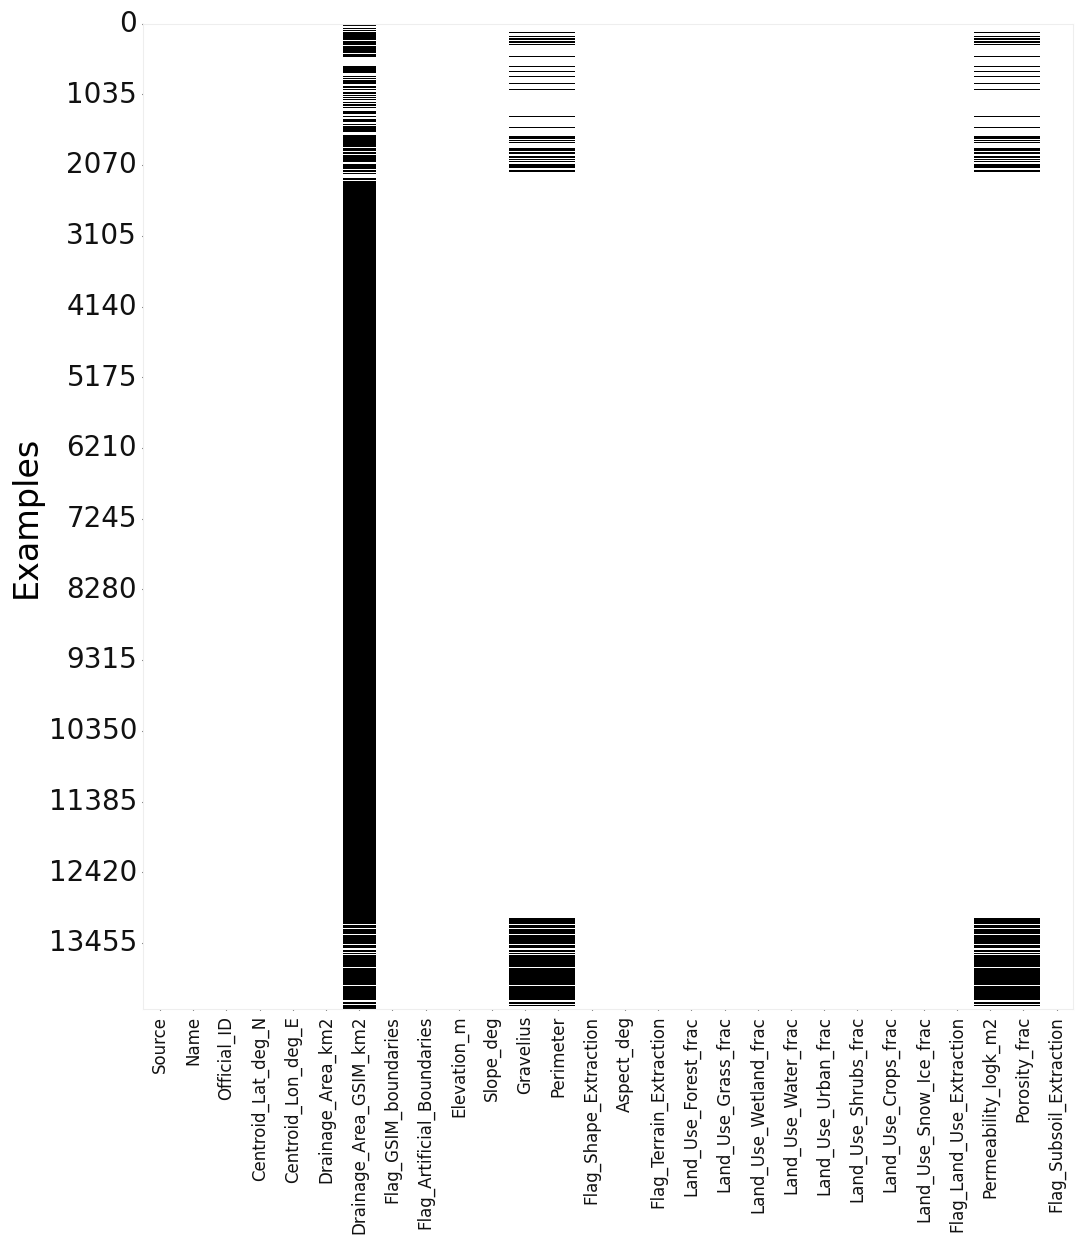

<AxesSubplot: ylabel='Examples'>

In [12]:
EDA(data=static, save=False).heatmap()

In [13]:
physical_features = []
soil_features = []
geological_features = []
flow_characteristics = []

In [14]:
static = static.dropna(axis=1)
static.shape

(14425, 12)

In [15]:
coords = dataset.stn_coords()
lat = coords['lat'].astype(float).values.reshape(-1,)
long = coords['long'].astype(float).values.reshape(-1,)

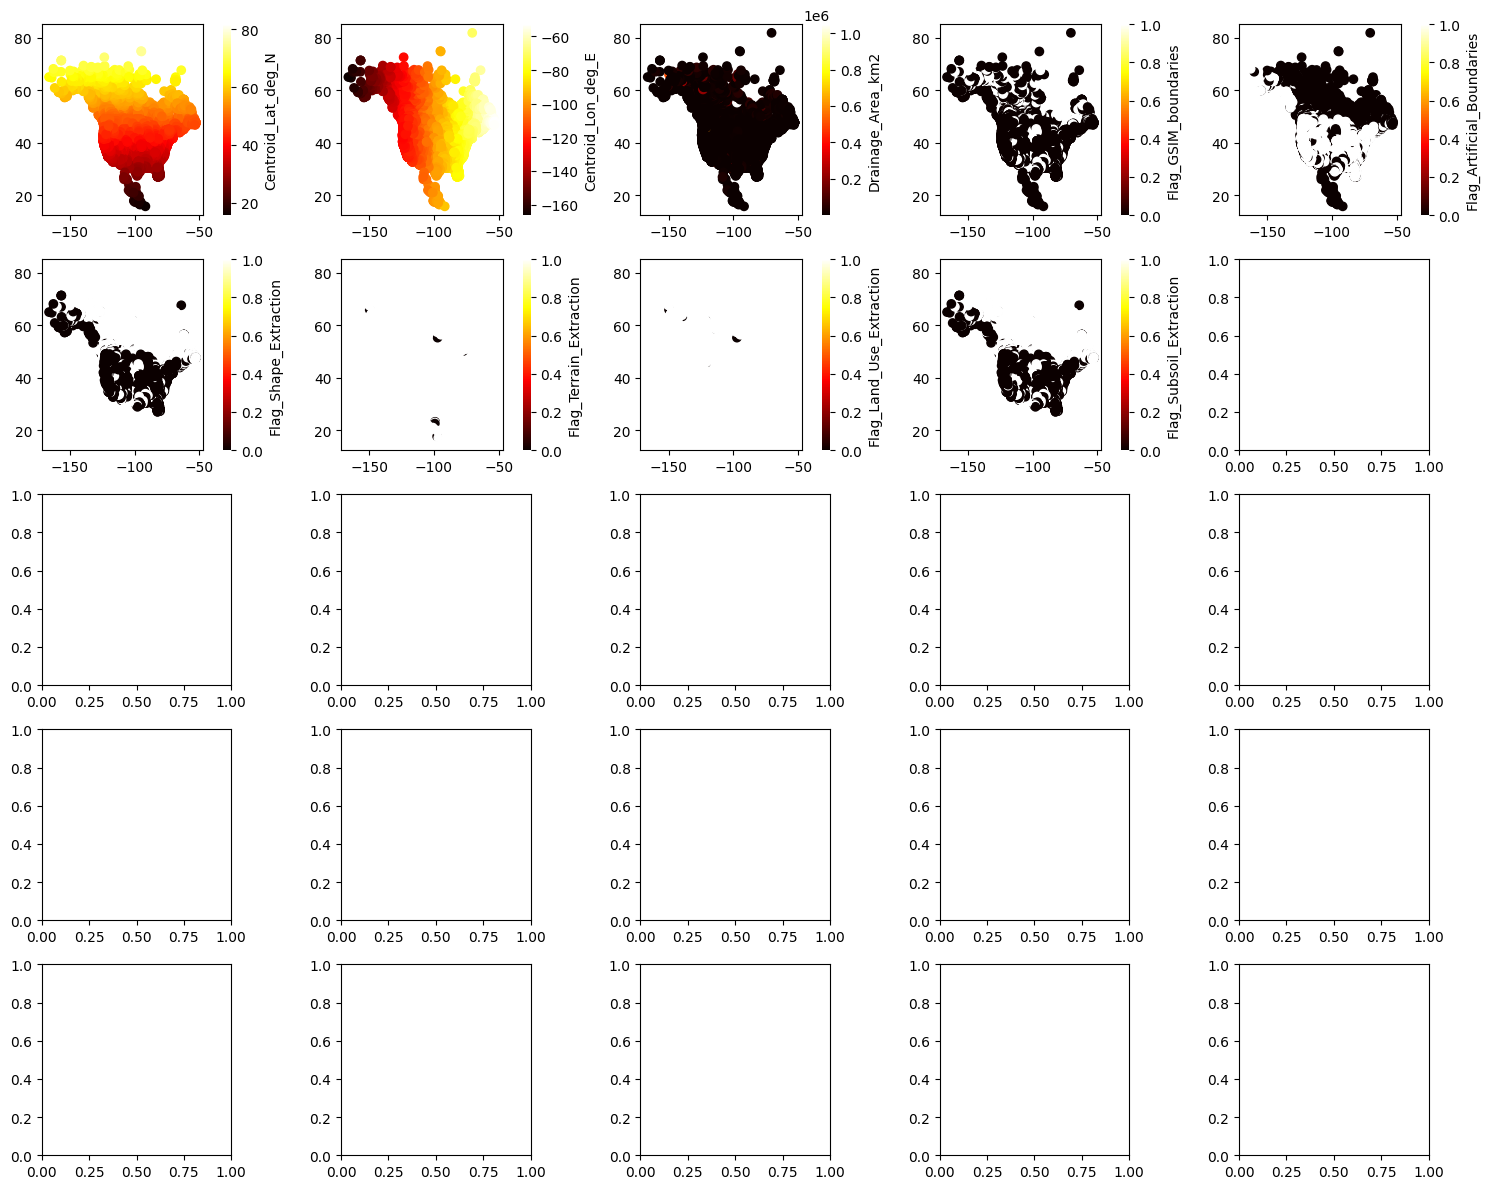

12


In [16]:
idx = 0
ax_num = 0

fig, axes = plt.subplots(5, 5, figsize=(15, 12))
axes = axes.flatten()

while ax_num < 25 and idx<static.shape[1]:
    
    val = static.iloc[:, idx]
    idx += 1
    
    try:
        c = val.astype(float).values.reshape(-1,)
             
        en = static.shape[0]
        ax = axes[ax_num]
        ax, sc = scatter(long[0:en], lat[0:en], c=c[0:en], cmap="hot", show=False, ax=ax) 

        process_cbar(ax, sc, border=False, title=val.name, #title_kws ={"fontsize": 14}
                    )
        ax_num += 1
    except ValueError:
        continue

plt.tight_layout()
plt.show()
print(idx)

### Dynamic Features

In [17]:
dataset.dynamic_features

['discharge', 'swe', 'tasmin', 'tasmax', 'pr']

#### Streamflow

In [32]:
streamflow = dataset.fetch(400, dynamic_features = 'discharge', as_dataframe=True)
streamflow = streamflow.reset_index()
streamflow.index = pd.to_datetime(streamflow.pop('time'))
streamflow.pop('dynamic_features')
streamflow.shape

(25202, 400)

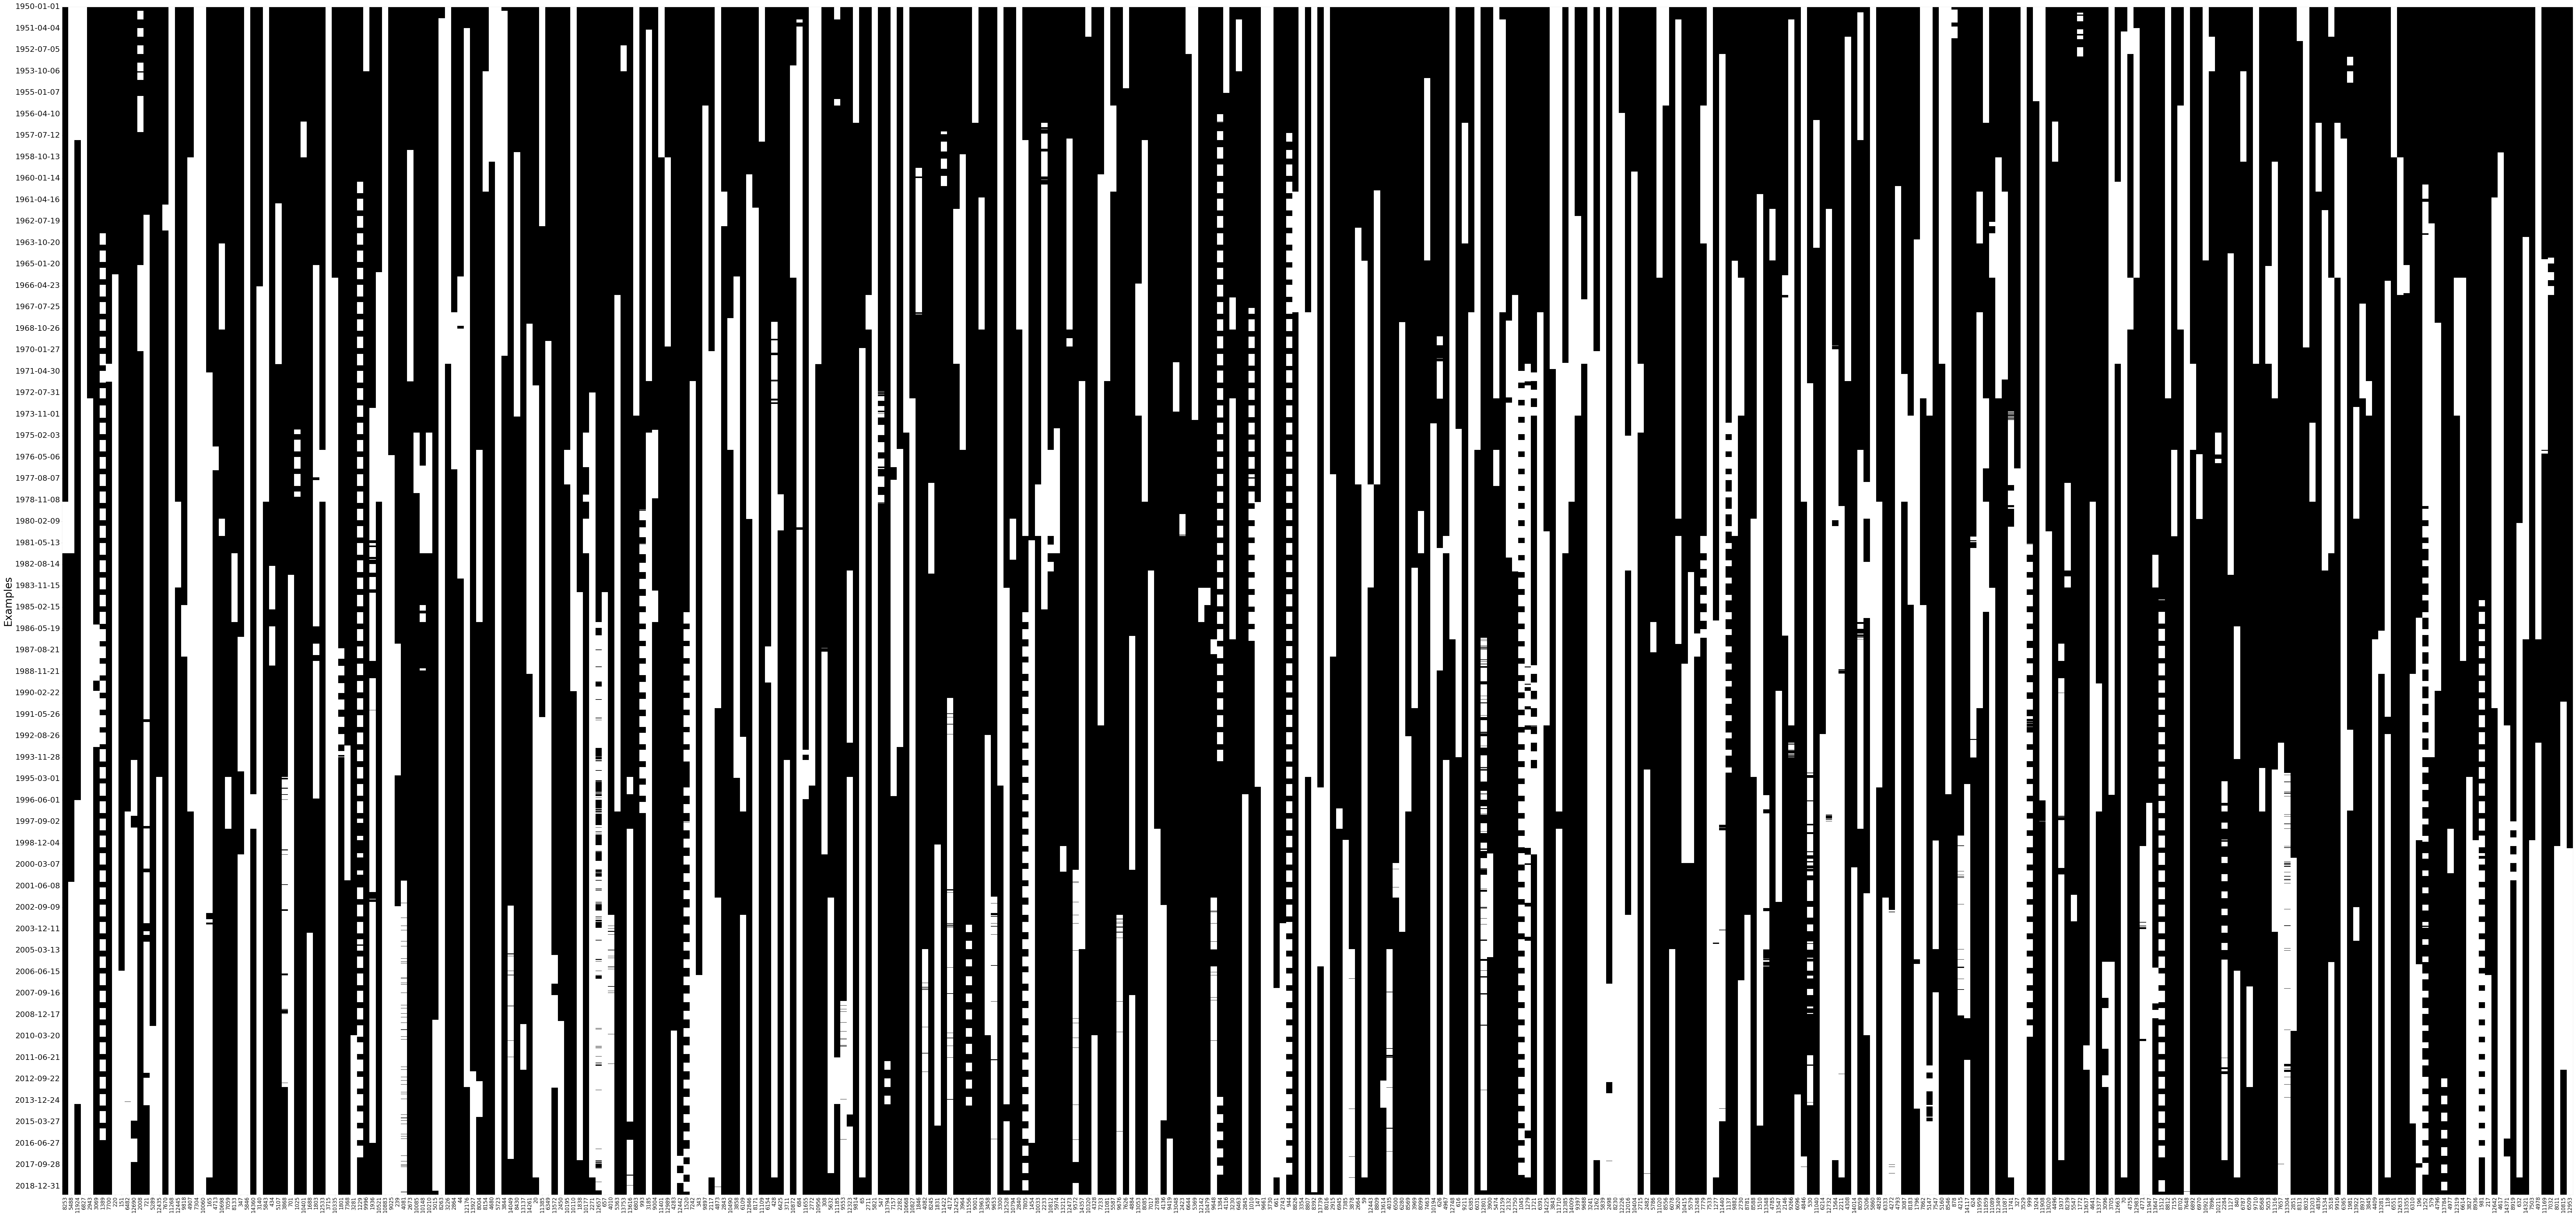

<Axes: ylabel='Examples'>

In [33]:
EDA(data=streamflow, save=False).heatmap()

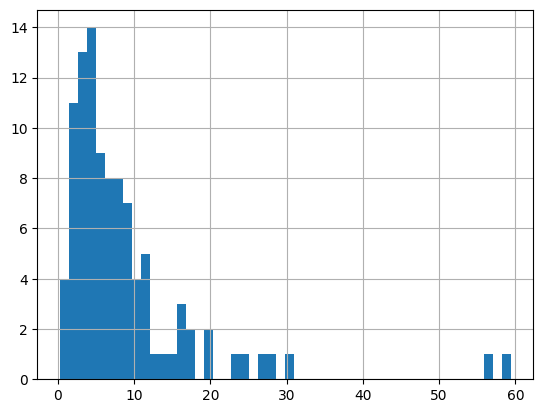

In [23]:
# skewness of streamflow

_ = hist(streamflow.skew().values.reshape(-1,), bins=50)

#### Snow Water Equivalent

(25202, 200)


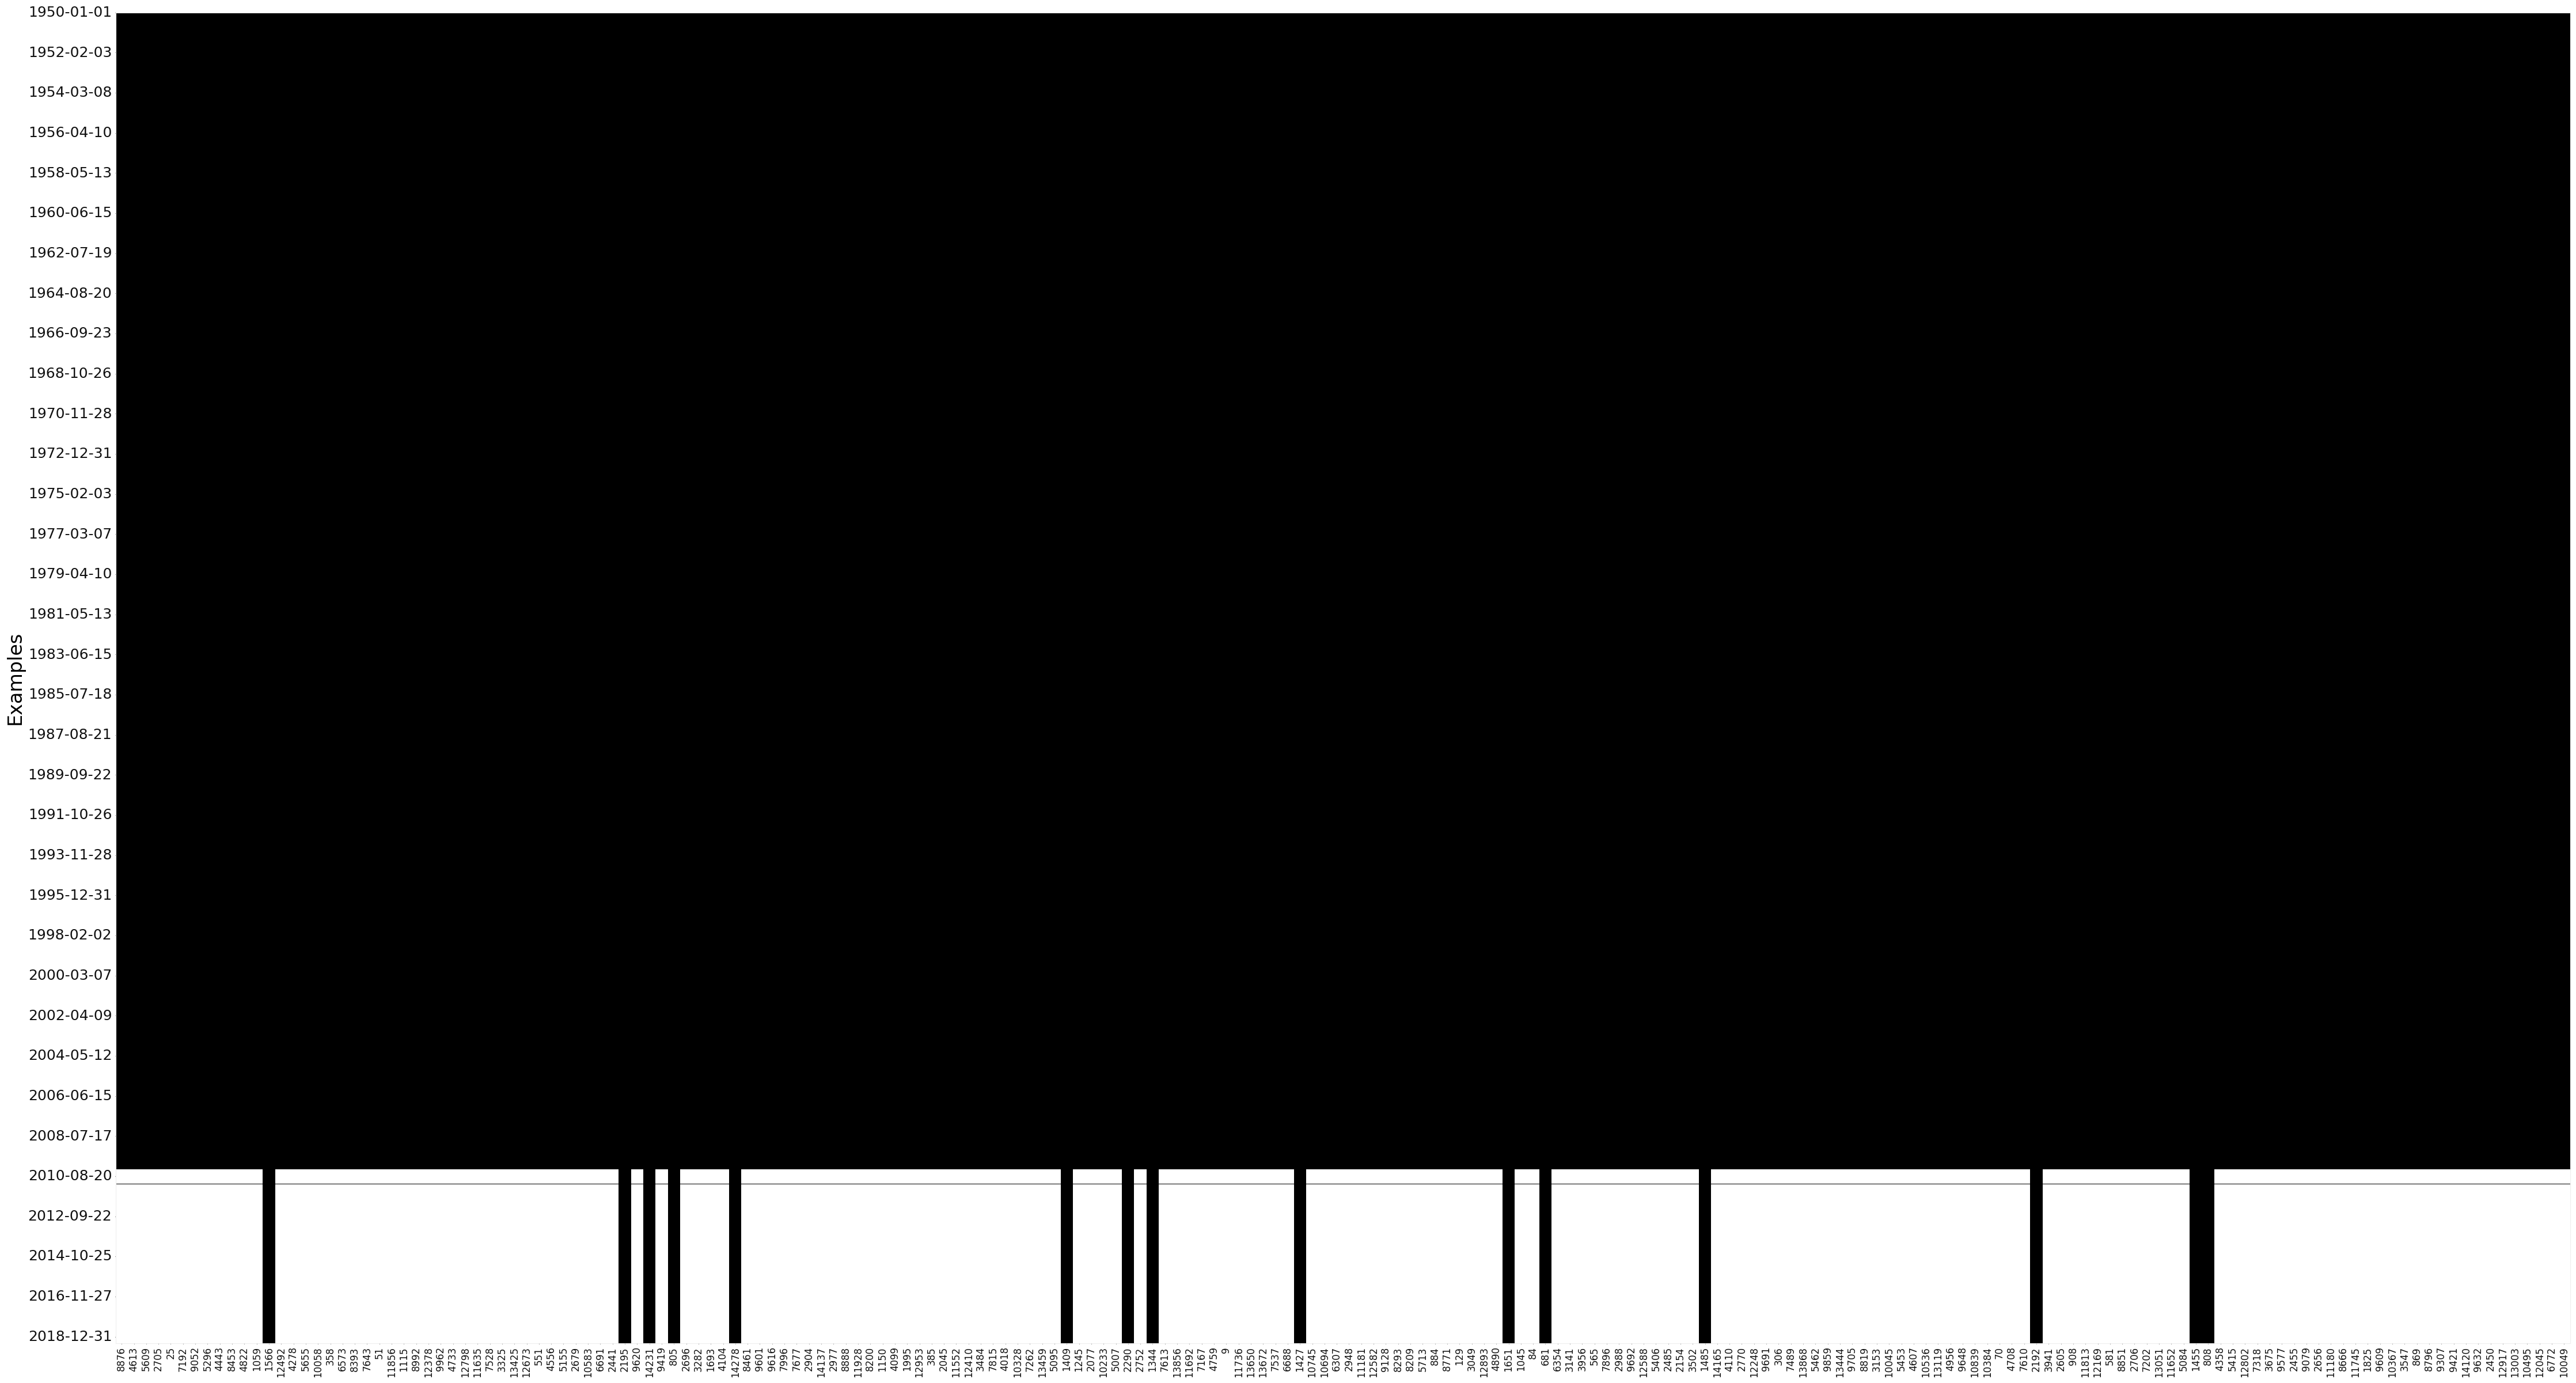

<Axes: ylabel='Examples'>

In [24]:
swe = dataset.fetch(200, dynamic_features = 'swe', as_dataframe=True)
swe = swe.reset_index()
swe.index = pd.to_datetime(swe.pop('time'))
swe.pop('dynamic_features')
print(swe.shape) 
EDA(data=swe, save=False).heatmap()

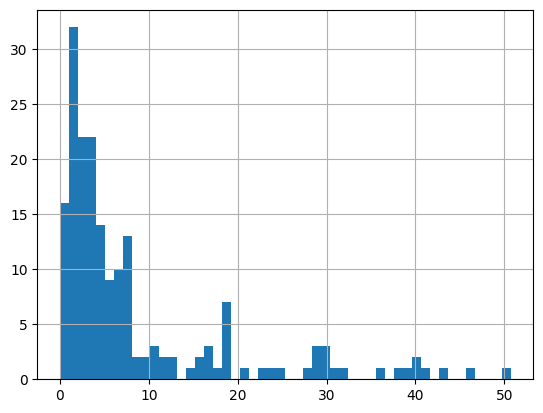

In [26]:
_ = hist(swe.skew().values.reshape(-1,), bins=50)

#### Air Temperature

(25202, 200)
(25202, 200)
(25202, 200)
(25202, 200)


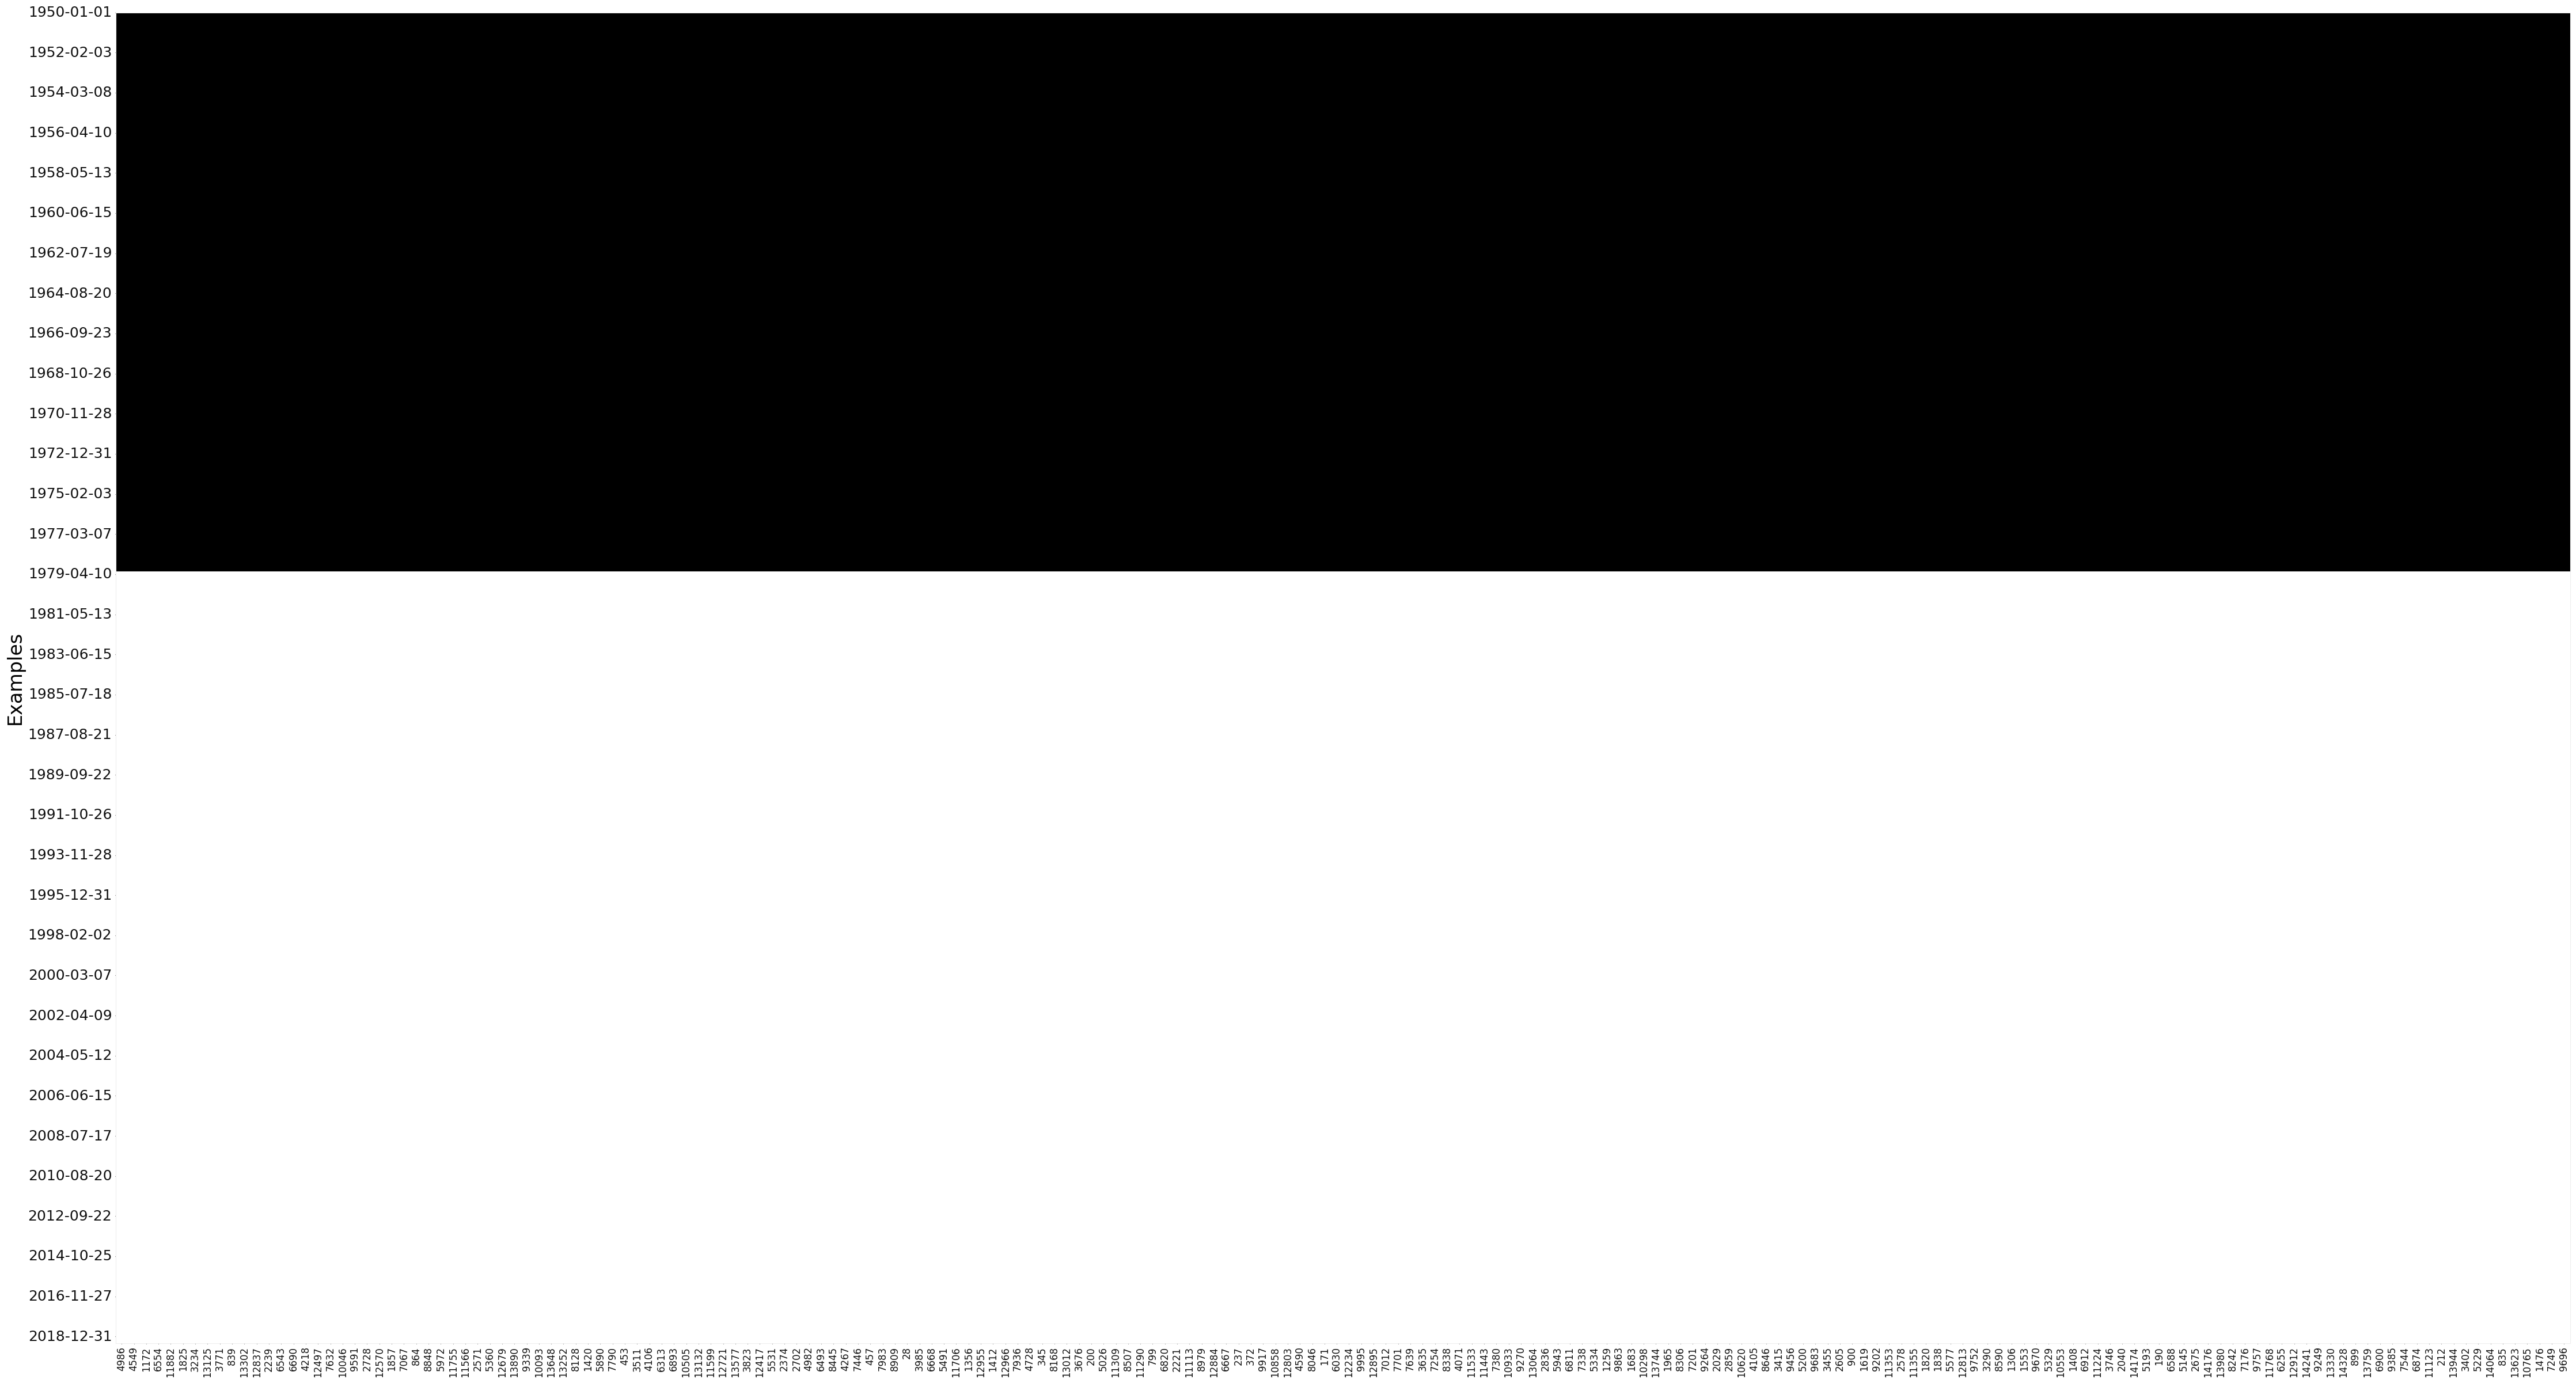

<Axes: ylabel='Examples'>

In [28]:
tmax = dataset.fetch(200, dynamic_features = 'tasmax', as_dataframe=True)
tmax = tmax.reset_index()
tmax.index = pd.to_datetime(tmax.pop('time'))
tmax.pop('dynamic_features')
print(tmax.shape)

tmin = dataset.fetch(200, dynamic_features = 'tasmin', as_dataframe=True)
tmin = tmin.reset_index()
tmin.index = pd.to_datetime(tmin.pop('time'))
tmin.pop('dynamic_features')
print(tmin.shape)

tavg = np.mean([tmax.values, tmin.values], axis=0)
print(tavg.shape)

tavg = pd.DataFrame(tavg, index = tmin.index, columns=tmin.columns.tolist())
print(tavg.shape)

EDA(data=tavg, save=False).heatmap()

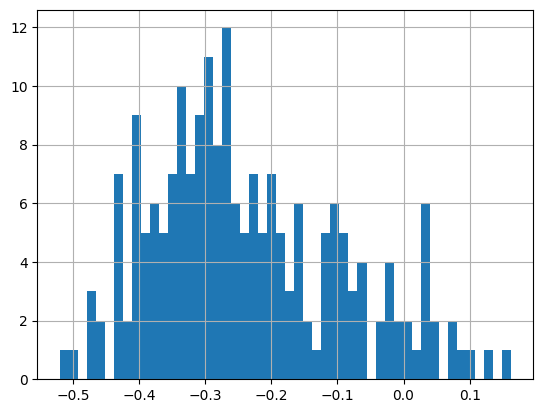

In [29]:

_ = hist(tavg.skew().values.reshape(-1,), bins=50)

#### Precipitation


(25202, 200)


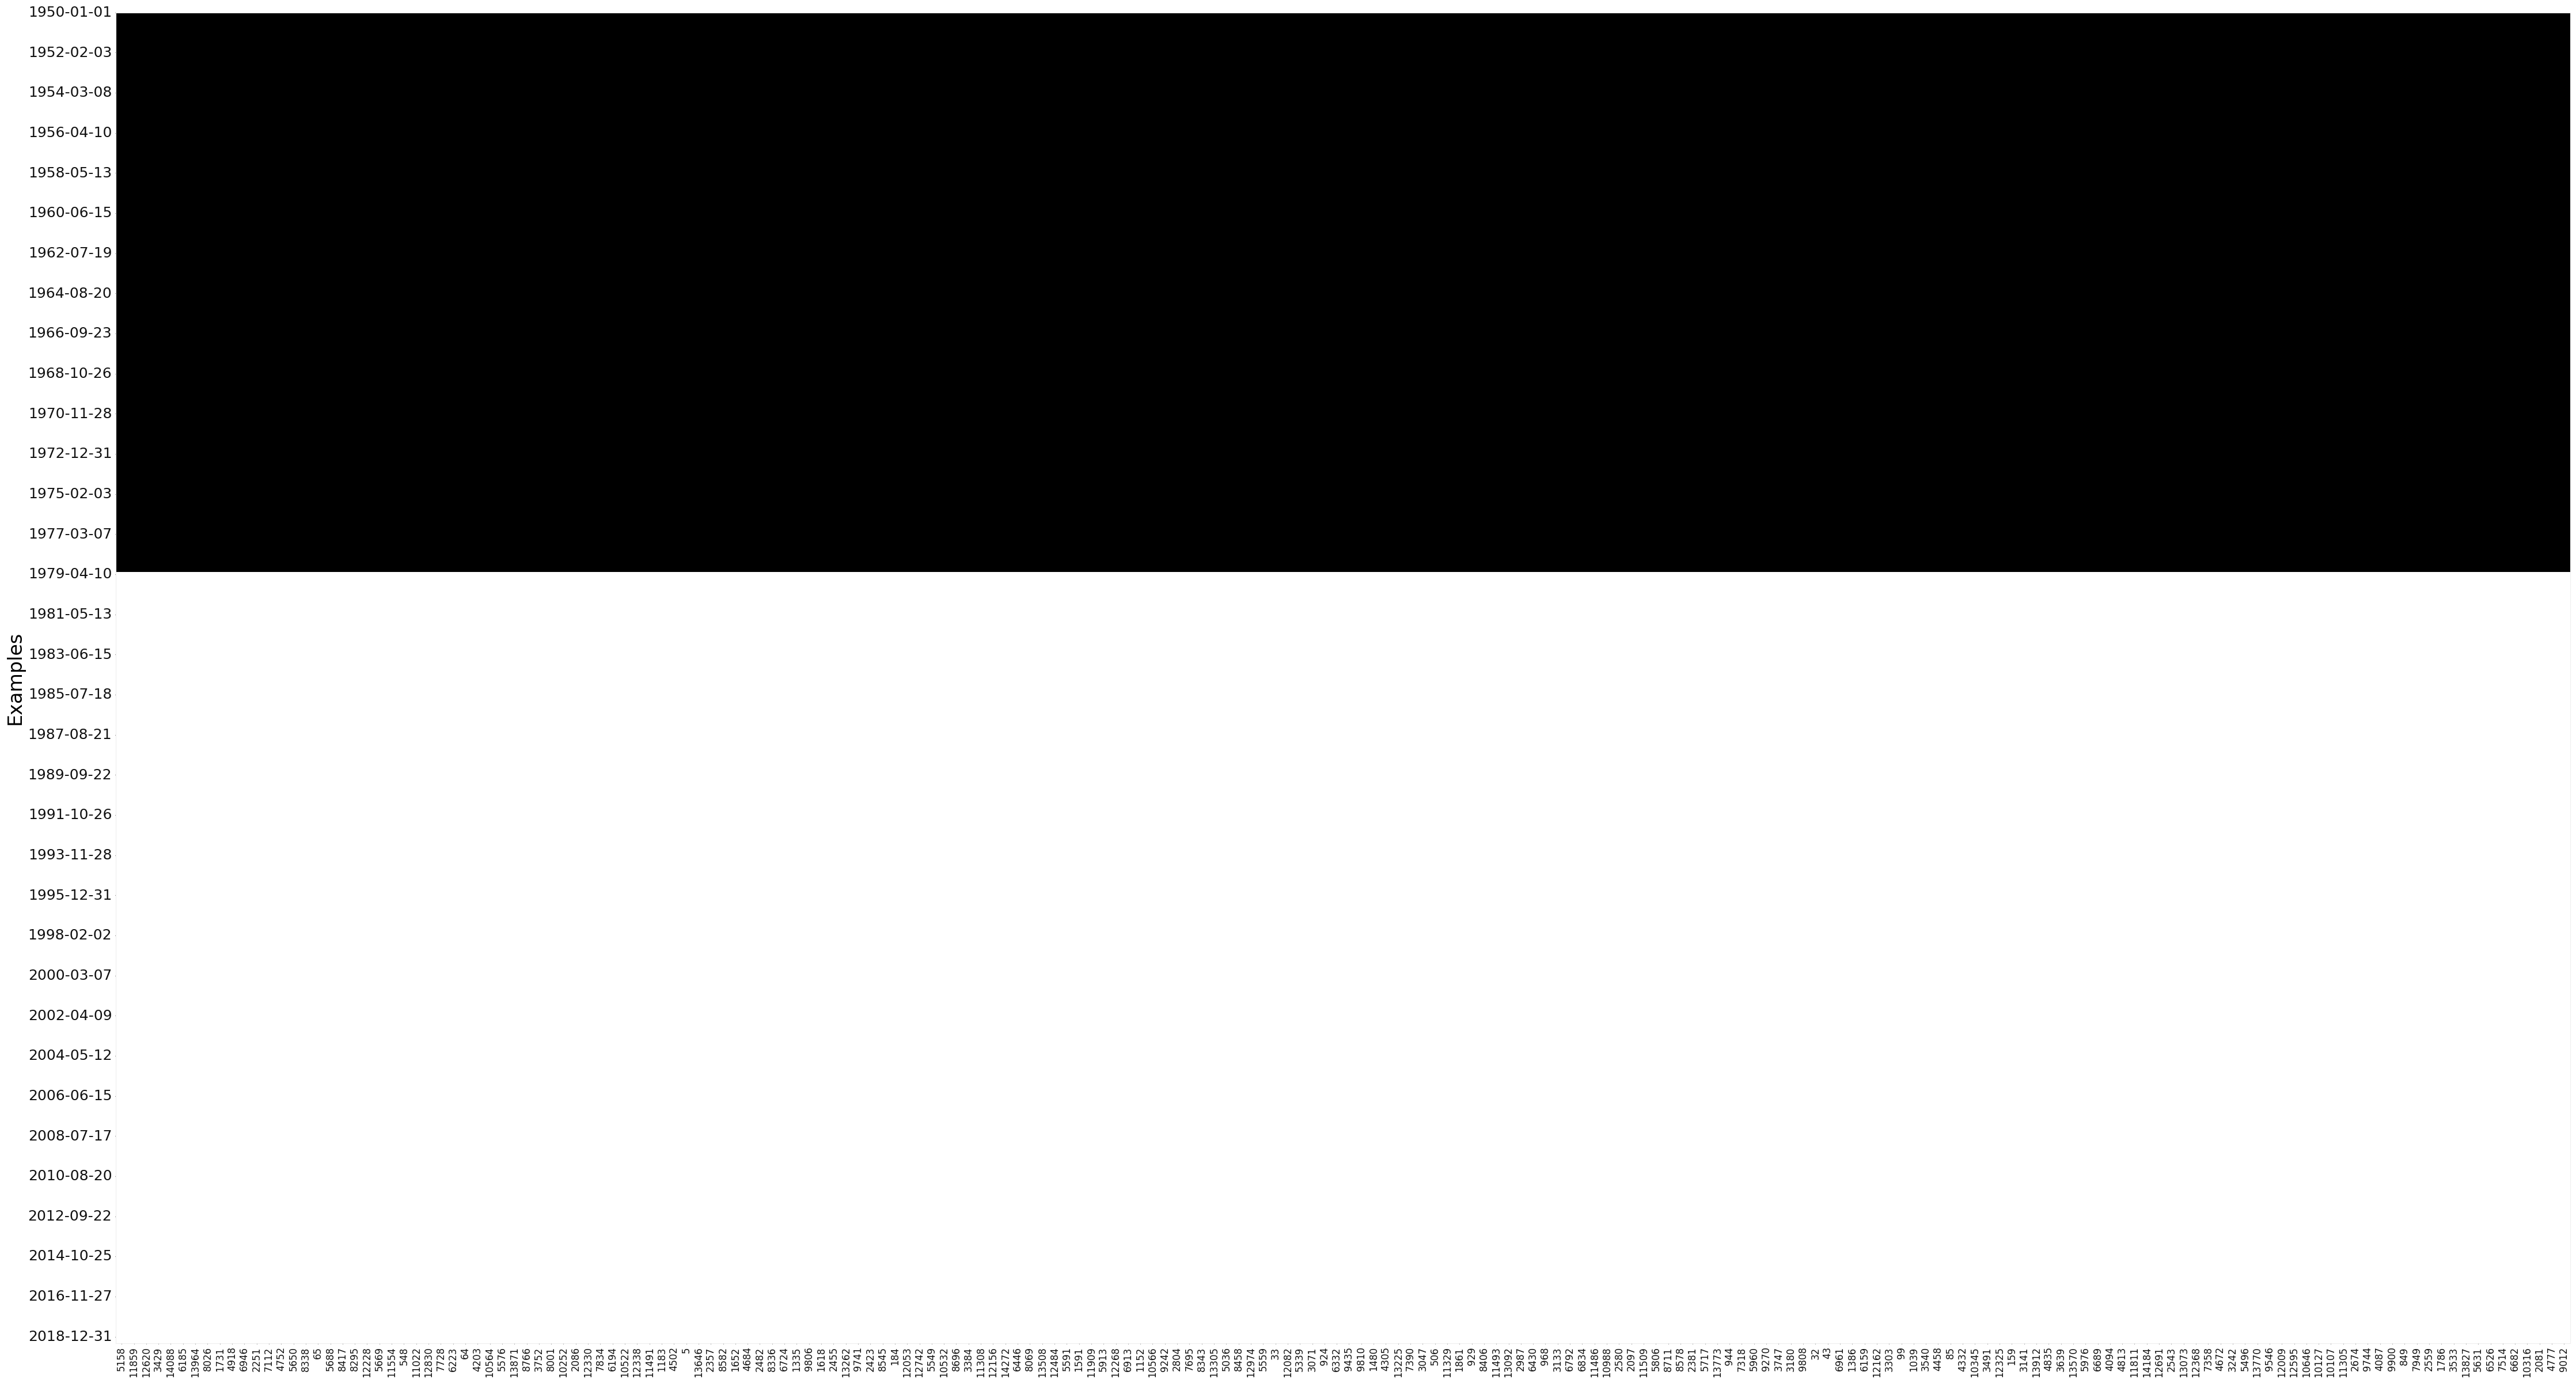

<Axes: ylabel='Examples'>

In [30]:
pcp = dataset.fetch(200, dynamic_features = 'pr', as_dataframe=True)
pcp = pcp.reset_index()
pcp.index = pd.to_datetime(pcp.pop('time'))
pcp.pop('dynamic_features')
print(pcp.shape) 
EDA(data=pcp, save=False).heatmap()

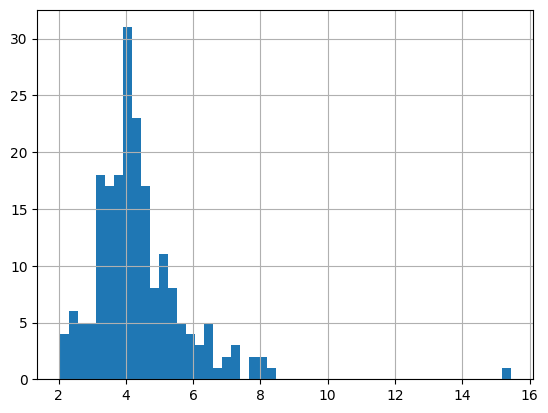

In [31]:
_ = hist(pcp.skew().values.reshape(-1,), bins=50)